In [15]:
import pandas as pd

# 데이터
| 변수 | 의미 | 기타 |
|---|---|---|
| age | 수익자의 연령 | 수치형 |
| sex | 계약자의 성별 | 범주형 데이터(female/male) |
| bmi | 미만도. 몸무게를 키의 제곱으로 나눈 값. | 수치형<br/>정상범위: 18.5~24.9 |
| children | 의료보험이 적용되는 자녀 수 | 수치형 데이터 |
| smoker | 흡연 여부 | 범주형 데이터(yes/no) |\n",| region | 거주지역 | 범주형<br/>(북동: northeast, 남동: southeast / 남서: southwest / 북서: northwest) |
| expense | 의료비 | 수치형 데이터 |

> 데이터 설명 

In [16]:
Data=pd.read_excel("https://data.hossam.kr/E04/insurance.xlsx")
data=pd.DataFrame(Data)

In [17]:
# 데이터 결측치 :0 , 타입 -> "sex","smoker","region" : object
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


EDA
======

## 연속형 데이터

### skewness&Kurtosis

#### age

In [18]:
print(f'''왜도(skewness): {data["age"].skew()}
첨도(kurtosis):{data["age"].kurtosis()}''')

왜도(skewness): 0.05567251565299186
첨도(kurtosis):-1.2450876526418673


#### bmi

In [19]:
print(f'''왜도(skewness): {data["bmi"].skew()}
첨도(kurtosis):{data["bmi"].kurtosis()}''')

왜도(skewness): 0.2840471105987448
첨도(kurtosis):-0.05073153135467834


#### childern

In [20]:
print(f'''왜도(skewness): {data["children"].skew()}
첨도(kurtosis):{data["children"].kurtosis()}''')

왜도(skewness): 0.9383804401702414
첨도(kurtosis):0.2024541467168901


#### charges

In [21]:
print(f'''왜도(skewness): {data["charges"].skew()}
첨도(kurtosis):{data["charges"].kurtosis()}''')

왜도(skewness): 1.5158796580240388
첨도(kurtosis):1.6062986532967907


## 시각화

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

### boxplot

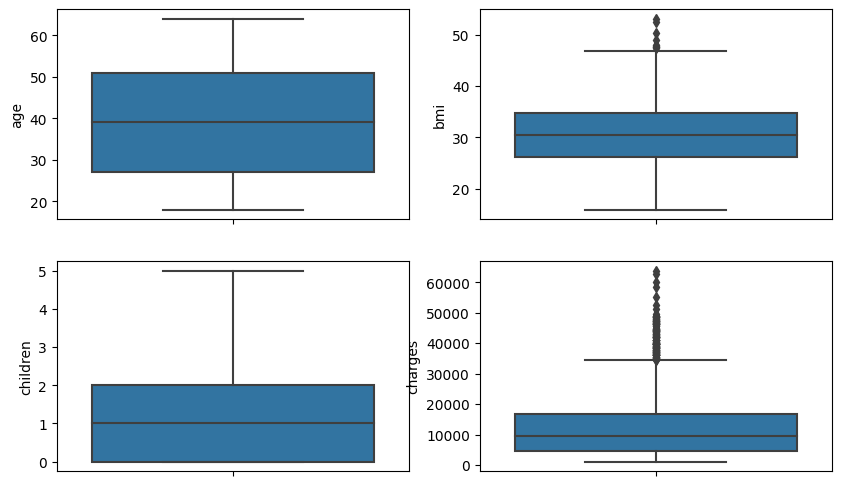

In [23]:
f,a=plt.subplots(2,2,figsize=(10,6))
a_list=[]
for x in a:
    for y in x:
        a_list.append(y)
for i in range(len(a_list)):
    sns.boxplot(data=data,y=f'{["age","bmi","children","charges"][i]}',ax=a_list[i])

<코맨트>
- 1. bmi와 charges에 이상치가 다소 발견됨
- 2. children은 이상치가 발견되지 않았으나 많은 데이터가 0~2사이에 속해있음

### 커널밀도함수&히스토그램

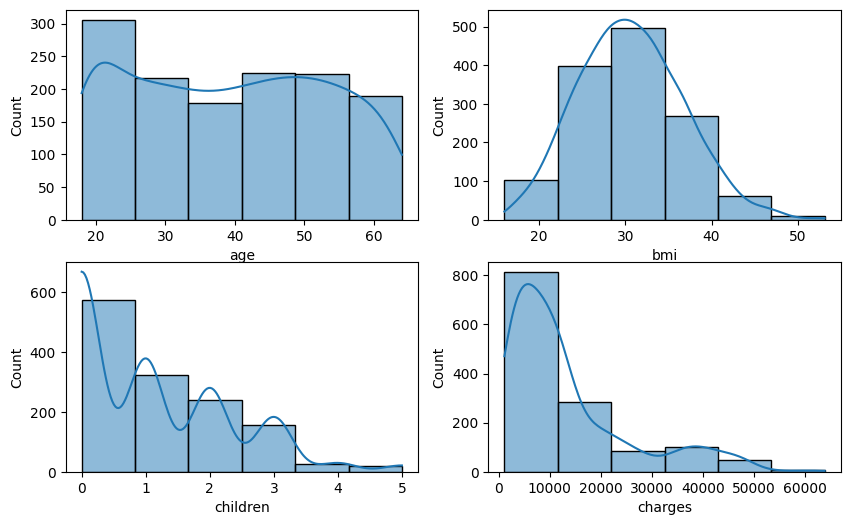

In [24]:
f,a=plt.subplots(2,2,figsize=(10,6))
a_list=[]
for x in a:
    for y in x:
        a_list.append(y)
for i in range(len(a_list)):
    sns.histplot(data=data,x=f'{["age","bmi","children","charges"][i]}',ax=a_list[i],kde=True,bins=6)

<코맨트>
- 1. bmi의 분포는 정규분포를 따르는 것으로 보임
- 2. age의 분포는 비교적 일정함
- 3. children의 분포는 boxplot에서의 코멘트와 마찬가지로 보이나, charges 또한 한쪽에 데이터가 밀집되어있음

## 상관관계

### pairplot

<Figure size 640x480 with 0 Axes>

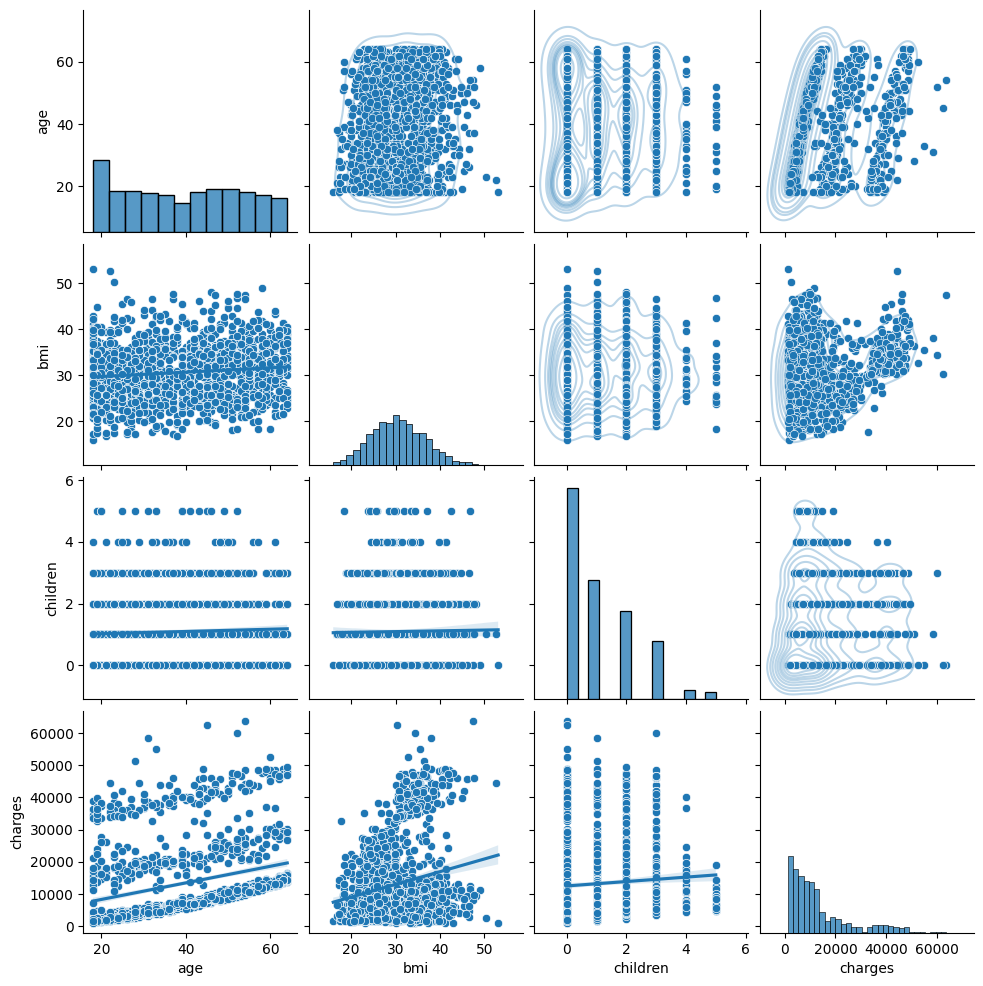

In [25]:
plt.figure()
graph=sns.pairplot(data=data[["age","bmi","children","charges"]])
graph.map_upper(sns.kdeplot,alpha=0.3)
graph.map_lower(sns.regplot,scatter=False)
plt.show()
plt.close()

<코맨트>
- 1. 어떠한 상관관계를 알아내기에 산점도 행렬만으로 부족함

### correlation matrix

In [26]:
data[["age","bmi","children","charges"]].corr(method="pearson").style.background_gradient(cmap="PuBu")

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<코맨트>
- 1. charges와 age 사이의 약한 상관관계가 보임
- 2. bmi와 age 사이에 약한 상관관계가 보임

## 범주형 데이터

### 시각화

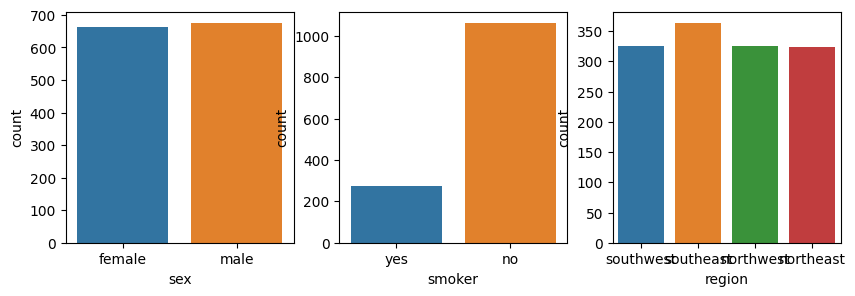

In [27]:
_,a=plt.subplots(1,3,figsize=(10,3))
for i in range(len(["sex","smoker","region"])):
    sns.countplot(data=data[["sex","smoker","region"]],x=["sex","smoker","region"][i],ax=a[i])

<코맨트>
- 1. sex,region의 value 사이의 데이터 수는 차이가 없어보이나 smoker 사이의 데이터 분포간 불균형이 보임

### 카이제곱 검정

In [43]:
step1=pd.crosstab(data["sex"],data["smoker"],margins=True)

In [44]:
step1

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


In [48]:
step2=step1.copy()

In [49]:
for x in ['no','yes']:
    for y in ["female",'male']:
        step2.loc[y,x]=step2.loc[y,x]=0

In [51]:
for x in ['no','yes']:
    for y in ["female",'male']:
        step2.loc[y,x]=(step2.loc[y,"All"]/step2.loc["All","All"])*(step2.loc["All","no"]/step2.loc["All","All"])*step2.loc["All","All"]

In [52]:
step2

smoker,no,yes,All
sex,,,
female,526.433483,526.433483,662
male,537.566517,537.566517,676
All,1064.000000,274.000000,1338


In [53]:
step1

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338
